<a href="https://colab.research.google.com/github/HelloJacob11/Data-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Exploring Sentiment Analysis on IMDb Reviews with Machine Learning Models"

> Building a simple ML model that uses the 50k Reviews from IMDb sentiment datset to predict if a review is positive or negative


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Data Download
- Dataset infomation
  - kaggle: IMDB Dataset of 50K Movie Reviews

In [ ]:
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)
!mv '/kaggle/input/imdb-dataset-of-50k-movie-reviews' '/content/drive/MyDrive/2025 Summer Projects'
'''

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")\n\nprint("Path to dataset files:", path)\n!mv \'/kaggle/input/imdb-dataset-of-50k-movie-reviews\' \'/content/drive/MyDrive/2025 Summer Projects\'\n'

## 2. Importing pandas to create a data frame

In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/2025 Summer Projects/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 3. EDA(Exploratory Data Analysis)

### 3.1 Categorizing Positive Reviews and Negative Reviews

In [ ]:
sentiment_pos=dataset[dataset['sentiment']=='positive']
sentiment_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 49995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


In [ ]:
sentiment_neg=dataset[dataset['sentiment']=='negative']
sentiment_neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 3 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


### 3.2 Visualization of # of Positive and Negative Reviews

#### 데이터 분류 모델 구현시 클래스의 비율이 중요한 이유
- The class ratio in a dataset is crucial when implementing a classification model to ensure that the ML model learns both classes evenly instead of favoring one class over the other.
  - For instance, if 90% of the data belongs to Class A and only 10% to Class B, then the ML model might learn to always predict "A," achieving 90% accuracy whil ignoring Class B.
    - This may skew the performance evaluation.
- As shown in this graph, the dataset contains an equal number of 25,000 positive and 25,000 negative reviews, and this makes this sentiment dataset appropriate to train an ML model


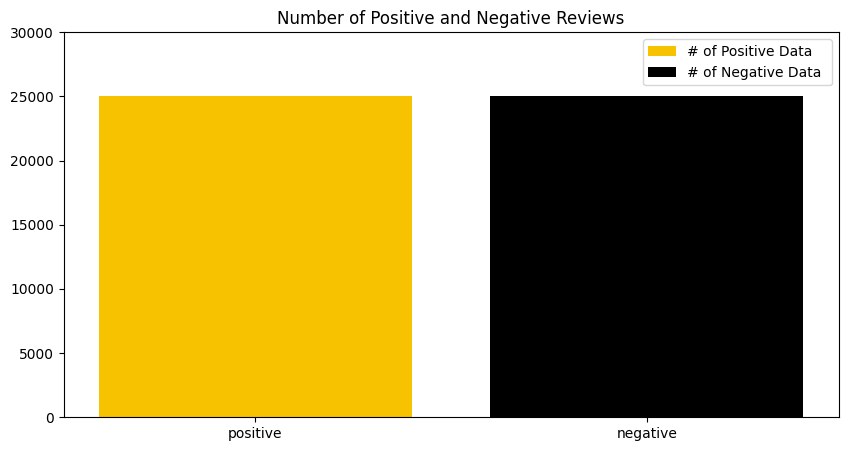

In [ ]:
import matplotlib.pyplot as plt
x1=["positive"]
x2=["negative"]
y1=[len(sentiment_pos)]
y2=[len(sentiment_neg)]
plt.figure(figsize=(10,5))
plt.title("Number of Positive and Negative Reviews")
plt.bar(x1,y1,color='#f7c200',label="# of Positive Data ")
plt.bar(x2,y2,color="#000000",label="# of Negative Data ")
plt.ylim(0,30000)
plt.legend()
plt.show()

#4 Buidling ML Model
## 4.1 Removing HTML text and extracting cleaned dataset
### Library: bs4
### Import BeautifulSoup
### **BeautifulSoup** is a python library designed for parsing HTML texts that facilitates the extraction process
#### Created a function that cleans the HTML text and returns the dataset that is free from parsers

In [ ]:
from bs4 import BeautifulSoup
def clean_html(text):
  return BeautifulSoup(text,"html.parser").getText(strip=True)

In [ ]:
dataset['review_clean'] = dataset['review'].apply(clean_html)
dataset.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production.The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


##4.2 Creating training and testing dataset



### Spilting dataset into a training set and a testing set to build the machine learning model
### Library: sklearn

- Import train_test_split to split data into subsets
- random_state=42-> sets a random seed to ensure the split is reproducible
- test_size=0.2-> 20% of the dataset for testing and 80% for training
- x_train: 80% of the cleaned reviews designed for training the model
- y_train: corresponding sentiment labels for x_train dataset
- x_test: 20% of the cleaned reviews  kept for testing the model
- y_test: corresponding sentiment labels for x_test dataset


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    dataset['review_clean'],
    dataset['sentiment'],
    test_size=0.2,
    random_state=42
)
x_train.head()

,review_clean
39087,That's what I kept asking myself during the ma...
30893,I did not watch the entire movie. I could not ...
45278,A touching love story reminiscent of In the M...
16398,This latter-day Fulci schlocker is a totally a...
13653,"First of all, I firmly believe that Norwegian ..."


In [ ]:
y_train.head()

,sentiment
39087,negative
30893,negative
45278,positive
16398,negative
13653,negative


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

##4.3 Creating Framework for ML Model

파이프라인으로 “전처리 <->모델”을 한 덩어리로 만들어 데이터 누수를 걱정할 일이 줄어들게 함

TfidfVectorizer는 텍스트를 수치화할 때 빈도×희소성을 동시에 고려해, 흔한 단어보다는 정보성이 높은 단어에 가중치를 실어 줌.

LogisticRegression은 선형 모델이라 빠르고 해석 가능하며, coef_를 통해 어떤 단어(또는 n-gram)가 예측을 주도했는지 확인할 수 있도록 함.

### Using a Pipeline Module
#### Pipeline connects two stages:
-1. Preprocessing with TfidfVectorizer   
-2. Modeling with LogisticRegression
#### * Pipeline prevents data leakage. All preprocessing steps are applied consistenyl during both training and prediction.

###Tfid Vectorizer: Converts the raw text data (iMDb reviews) into numerical features that ML models can understand
- Converts all text to lowercase
- Remove all stop words such as "and" or "the"
- ngram(1,2)-> Considers both single words and two-word combinations like "great" and "great movie"
- max_df=0.95->Ignores any word that is common across over 95% of reviews
- min_df=2-> Include words or phrases that appear in at least two reviews

###Logistic Regression:A linear classifier that decides whether a review is positive or negative based on the numerical features from TF-IDF (Term Frequency - Inverse Document Frequency)
- max_iter=1000->sets the maximum number of iterations the algorithm will run to find the best fit of logistic regression. Max_iter such as 10,000 or greater may result in over fit, therefore 1,000 is idea
- C=4.0->Regularization strength or sensibility.
Larger C such as 4.0 means weaker regularization, allowing the model to fit the training data more closely. On the other hand, smaller C prevents overfitting.


In [ ]:
clf= Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1,2),
        max_df=0.95,
        min_df=2
    )),('logreg', LogisticRegression(
        max_iter=1000,
        C=4.0
    ))

])
clf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logreg', LogisticRegression(C=4.0, max_iter=1000))])

##4.4 Training and Analyzing ML Model

### 1. Training pipeline using x_train and y_train

### 2. Accessing the Components of the Pipeline
a. clf.named_steps allows TfidVectorizer and LogisticRegression to have access to individual parts of the piepline.

b. Using named_steps, vec is the trained TfidfVectorizer to extract features and log is the trained LogisticRegression model that makes the predictions.

### 3. Extracting Features and Coefficients
words: All words used in the TF-IDF  
log.coef_0: Coefficients (weights) the model assigns to each word

#### 4. Finding Top N Positive and Negative Words

top_pos:Indices of the top N words that mostly align with positive sentiment
top_neg: Indices of the top N words that mostly align with negative sentiment

#### 5. Visualization
Defines a function that plots the bar chart that visualizes the words and their weights
*Higher weights mean stronger influence on prediction


In [ ]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logreg', LogisticRegression(C=4.0, max_iter=1000))])

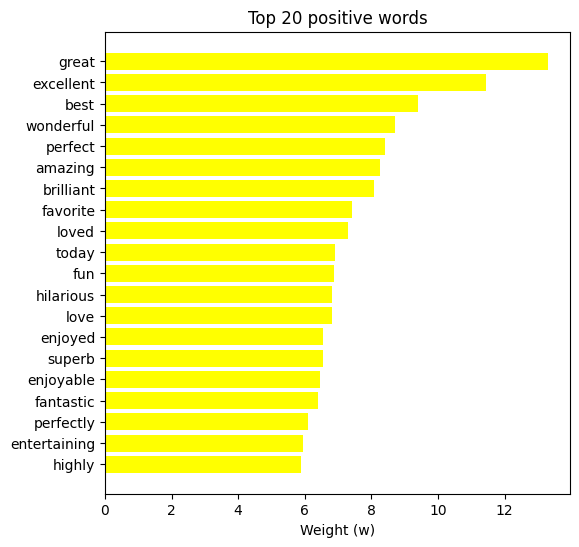

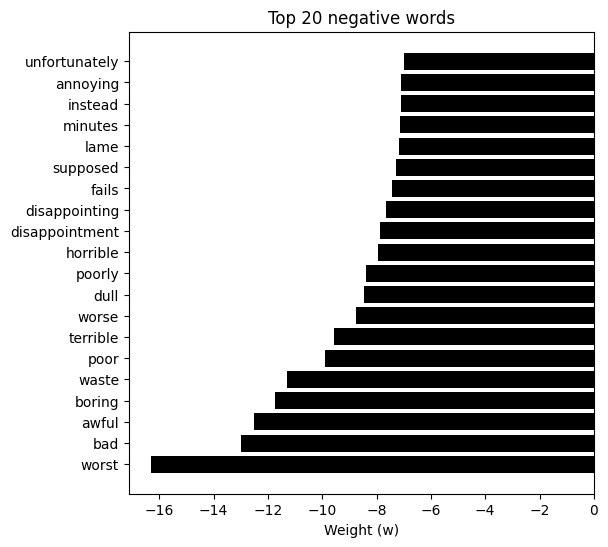

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vec: TfidfVectorizer = clf.named_steps['tfidf']
log: LogisticRegression=clf.named_steps['logreg']

words=np.array(vec.get_feature_names_out())
coef =log.coef_[0]

N=20
top_pos= np.argsort(coef)[-N:] # Largest weights (positive sentiment)
top_neg=np.argsort(coef)[:N] # Smallest weights (negative sentiment)

def barh(idx, title, color):
  plt.figure(figsize=(6,6))
  plt.barh(words[idx], coef[idx], color=color)
  plt.title(title)
  plt.xlabel("Weight (w)")
  plt.show()

barh(top_pos, f"Top {N} positive words", "yellow")
barh(top_neg, f"Top {N} negative words", "black")


#5 Evaluating ML Model

##5.1 Measuring model performance

Import tools from sklearn.metrics

Uses the ML model to predict sentiment labels for the x_test reviews and comparing its accuracy by comparing it with y_test

Accuracy: # of correct predictions / Total number of predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediction=clf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(classification_report(y_test,prediction, digits=3))


Accuracy: 0.9047
              precision    recall  f1-score   support

    negative      0.916     0.889     0.902      4961
    positive      0.894     0.920     0.907      5039

    accuracy                          0.905     10000
   macro avg      0.905     0.905     0.905     10000
weighted avg      0.905     0.905     0.905     10000

